In [ ]:
import pandas as pd
import ast
from itertools import chain
from nltk import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

## Frequent Word Analysis

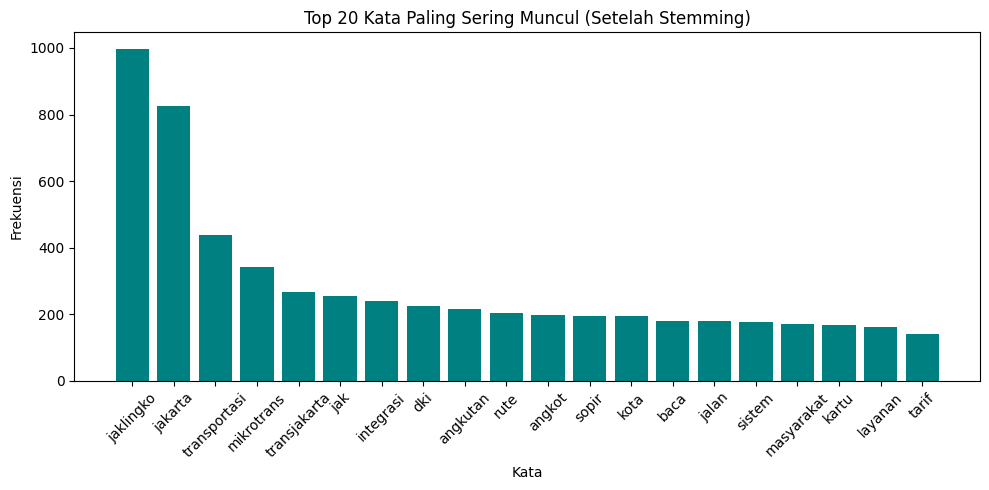

📊 Top 20 kata paling sering muncul:
            Word  Frequency
0      jaklingko        997
1        jakarta        826
2   transportasi        438
3     mikrotrans        342
4   transjakarta        268
5            jak        255
6      integrasi        239
7            dki        225
8       angkutan        215
9           rute        204
10        angkot        197
11         sopir        196
12          kota        195
13          baca        180
14         jalan        180
15        sistem        178
16    masyarakat        172
17         kartu        167
18       layanan        163
19         tarif        140


In [ ]:
# === Load dataset ===
df = pd.read_csv("jaklingko_text_final.csv")

# Pastikan kolom 'stemmed_tokens' tersedia dan dalam bentuk list
if 'stemmed_tokens' in df.columns:
    if isinstance(df['stemmed_tokens'].iloc[0], str):
        df['stemmed_tokens'] = df['stemmed_tokens'].apply(ast.literal_eval)
else:
    raise KeyError("Kolom 'stemmed_tokens' tidak ditemukan di dataset.")

# === Gabungkan semua kata hasil stemming ===
all_words = list(chain.from_iterable(df['stemmed_tokens']))

# === Hitung frekuensi kata ===
freq_dist = FreqDist(all_words)
freq_df = pd.DataFrame(freq_dist.most_common(20), columns=['Word', 'Frequency'])

# === Visualisasi ===
plt.figure(figsize=(10,5))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='teal')
plt.title("Top 20 Kata Paling Sering Muncul (Setelah Stemming)")
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

print("📊 Top 20 kata paling sering muncul:")
print(freq_df)


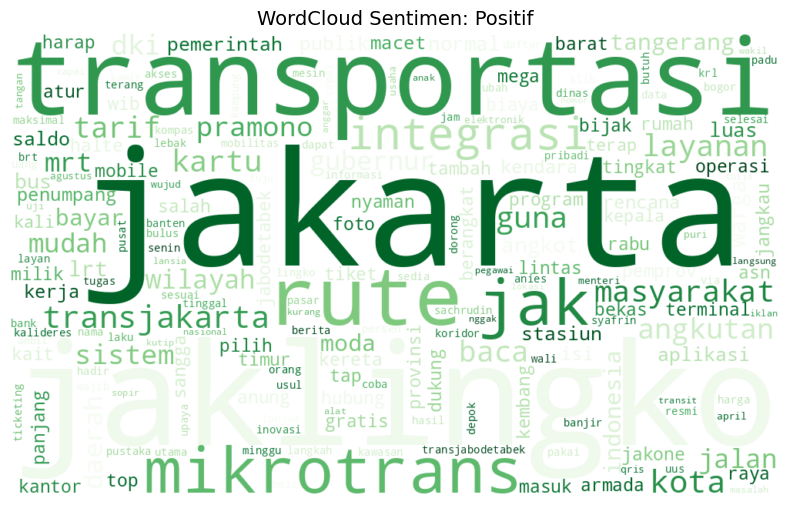

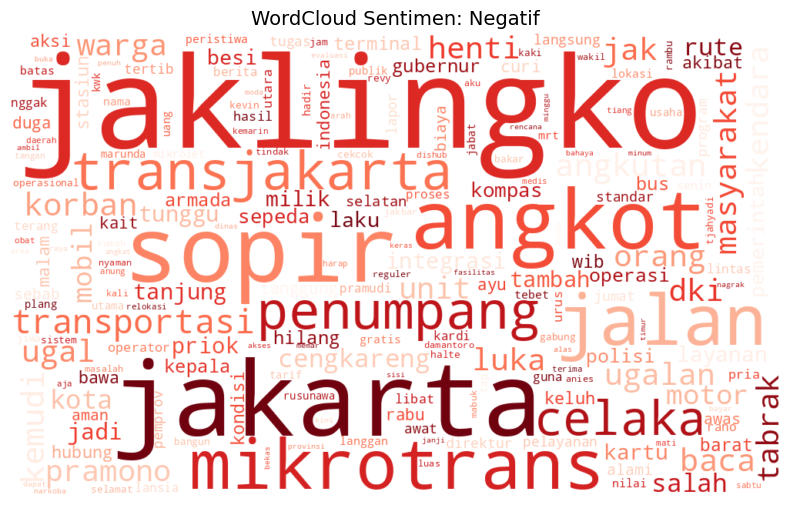

In [ ]:
# ============================================================
# ☁️ WORDCLOUD UNTUK SENTIMEN POSITIF & NEGATIF
# ============================================================

# 1️⃣ Pastikan kolom token siap digunakan
if 'stemmed_tokens' in df.columns:
    if isinstance(df['stemmed_tokens'].iloc[0], str):
        df['stemmed_tokens'] = df['stemmed_tokens'].apply(ast.literal_eval)
else:
    raise KeyError("Kolom 'stemmed_tokens' tidak ditemukan di dataset.")

# 2️⃣ Normalisasi kolom sentimen (positif / negatif / netral)
df['sentiment'] = df['sentiment'].str.lower().str.strip()

# 3️⃣ Fungsi untuk gabungkan token per sentimen
def get_text_by_sentiment(label):
    tokens = list(chain.from_iterable(df[df['sentiment'] == label]['stemmed_tokens']))
    return ' '.join(tokens)

# 4️⃣ Fungsi untuk menampilkan WordCloud
def plot_wordcloud(text, title, color_map):
    if not text.strip():
        print(f"Tidak ada teks untuk kategori '{title}'.")
        return
    wordcloud = WordCloud(
        width=1000,
        height=600,
        background_color='white',
        collocations=False,
        colormap=color_map
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Sentimen: {title.capitalize()}", fontsize=14)
    plt.show()

# ============================================================
# GENERATE WORDCLOUD UNTUK SENTIMEN POSITIF DAN NEGATIF
# ============================================================

for sentiment_label, color_map in [("positif", "Greens"), ("negatif", "Reds")]:
    text = get_text_by_sentiment(sentiment_label)
    plot_wordcloud(text, sentiment_label, color_map)


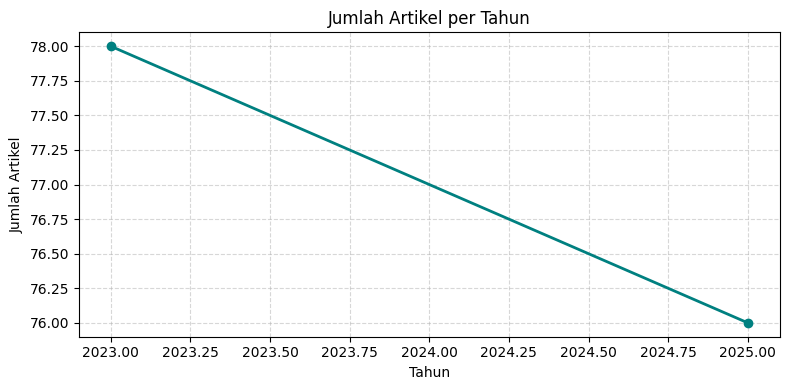

📊 Jumlah artikel per tahun:
   Year  count
0  2023     78
1  2025     76


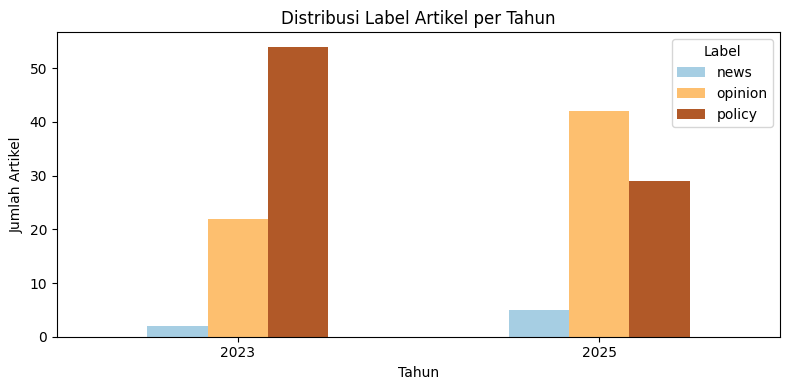

📊 Distribusi label per tahun:
content_label  news  opinion  policy
Year                                
2023              2       22      54
2025              5       42      29


In [ ]:
# =====================
# DESCRIPTIVE ANALYSIS
# =====================

# Pastikan kolom tanggal dan label ada
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'content_label'])

# === Tambah kolom tahun ===
df['Year'] = df['Date'].dt.year

# === Jumlah artikel per tahun ===
article_per_year = df.groupby('Year').size().reset_index(name='count')

plt.figure(figsize=(8,4))
plt.plot(article_per_year['Year'], article_per_year['count'],
         marker='o', color='teal', linewidth=2)
plt.title('Jumlah Artikel per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Artikel')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("📊 Jumlah artikel per tahun:")
print(article_per_year)

# === Distribusi label berdasarkan tahun ===
label_per_year = df.groupby(['Year', 'content_label']).size().unstack(fill_value=0)

label_per_year.plot(kind='bar', stacked=False, figsize=(8,4), colormap='Paired')
plt.title('Distribusi Label Artikel per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

print("📊 Distribusi label per tahun:")
print(label_per_year)
